Imorter les bibliotheques necessaires

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importer la dataset


In [7]:
dataset=pd.read_csv('titanic.csv')

Afficher les colones de la dataset

In [10]:
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [11]:
dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


la dataset est déja netoyée

#Analyze, identify patterns, and explore the data
Survived: Survived (1) or died (0)
Pclass: Passenger's class
Name: Passenger's name
Sex: Passenger's sex
Age: Passenger's age
SibSp: Number of siblings/spouses aboard
Parch: Number of parents/children aboard
Fare: Fare


 grouper les données par classe de billet ('Pclass'), calcule le taux de survie moyen pour chaque classe,puis trie les résultats par ordre décroissant de taux de survie.

In [17]:
dataset[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.244353


In [18]:
dataset[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.190227


Variation with class and gender, women made it alive on the Titanic way more than men because women and children were provided with lifeboats first when the Titanic was sinking 

#Analyzing data by visualizing it

Number of people who survived distributed over age

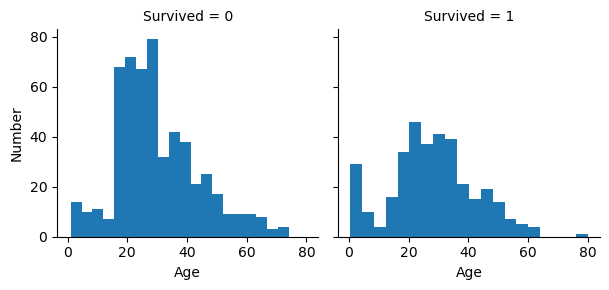

In [24]:
age_hist = sns.FacetGrid(dataset, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

Number of people who survived over age and passenger class

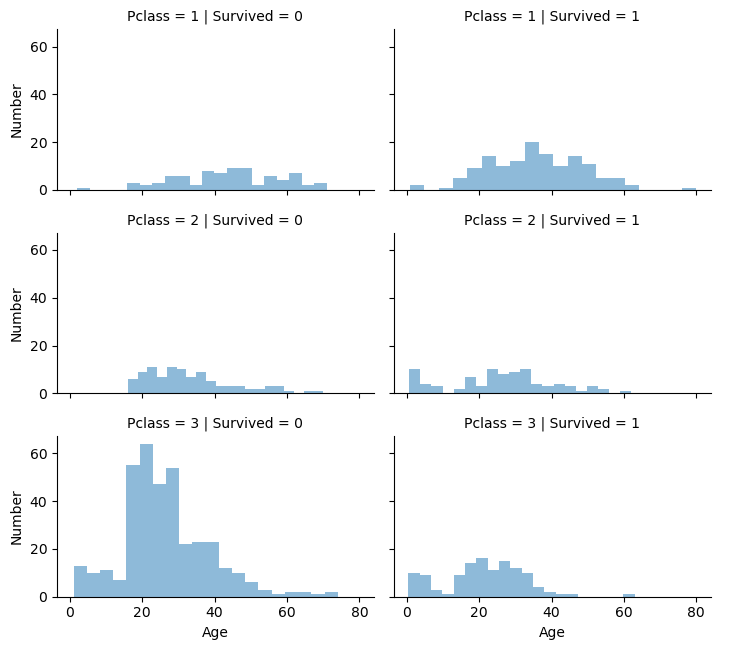

In [29]:
pclass_age_grid = sns.FacetGrid(dataset, col='Survived', row='Pclass',height=2.2, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

In [30]:
survived = dataset[dataset['Survived'] == 1]  
unsurvived = dataset[dataset['Survived'] == 0] 

In [35]:
survived

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
...,...,...,...,...,...,...,...,...
871,1,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250
875,1,1,Mrs. Thomas Jr (Lily Alexenia Wilson) Potter,female,56.0,0,1,83.1583
876,1,2,Mrs. William (Imanita Parrish Hall) Shelley,female,25.0,0,1,26.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000


In [36]:
unsurvived

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
...,...,...,...,...,...,...,...,...
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500


In [ ]:
for 